# OpenCV

In [23]:
# pip install pysaliency

In [1]:
# saliency map
import cv2
import matplotlib.pyplot as plt

# 입력 영상 로드
image = cv2.imread('content/frame_0050.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB로 변환

# 살리언시 맵 생성기 초기화
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# 살리언시 맵 계산
(success, saliencyMap) = saliency.computeSaliency(image)

# 살리언시 맵을 이진화
saliencyMap = (saliencyMap * 255).astype("uint8")

# 결과 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image)
ax1.set_title("Image")
ax1.axis("off")

ax2.imshow(saliencyMap, cmap='gray')
ax2.set_title("Saliency Map")
ax2.axis("off")

plt.show()

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

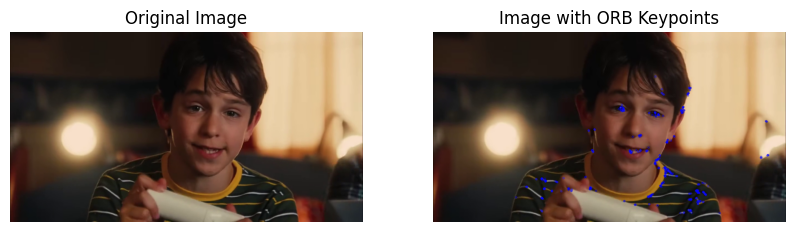

In [25]:
# 특징점
import cv2
import matplotlib.pyplot as plt

# 입력 영상 로드
image = cv2.imread('content/frame_0050.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB로 변환

# ORB 특징점 검출기 초기화
orb = cv2.ORB_create()

# 특징점 검출
keypoints = orb.detect(image, None)

# 특징점 그리기
image_with_keypoints = cv2.drawKeypoints(image_rgb, keypoints, None, color=(0, 0, 255))

# 결과 표시
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(image_rgb)
ax1.set_title("Original Image")
ax1.axis("off")

ax2.imshow(image_with_keypoints)
ax2.set_title("Image with ORB Keypoints")
ax2.axis("off")

plt.show()

# DeepGaze IIE

In [26]:
import torch
import deepgaze_pytorch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import zoom
from scipy.special import logsumexp

# 이미지를 불러옵니다.
image_path = 'content/frame_0050.png'  # 여기에 자신의 이미지 경로를 입력하세요.
image = Image.open(image_path)
image = image.resize((1024, 768))  # 필요에 따라 이미지를 리사이즈합니다.
image = np.array(image)

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# centerbias 다운로드: https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)
# 이미지를 NumPy 배열로 변환한 후 텐서로 변환
image_np = np.array([image.transpose(2, 0, 1)])
image_tensor = torch.tensor(image_np).to(DEVICE)

centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor)

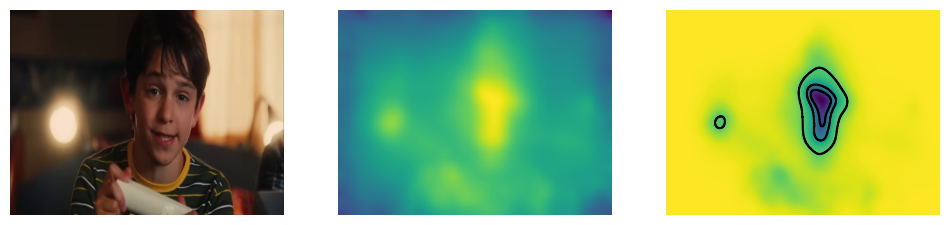

In [ ]:
import matplotlib.pyplot as plt
from pysaliency.plotting import visualize_distribution

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].set_axis_off()
visualize_distribution(log_density_prediction.detach().cpu().numpy()[0, 0], ax=axs[2])
axs[2].set_axis_off()

# DeepGaze III

In [2]:
import deepgaze_pytorch
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

Using cache found in /home/bok20/.cache/torch/hub/pytorch_vision_v0.6.0
/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bok20/mediapipe/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


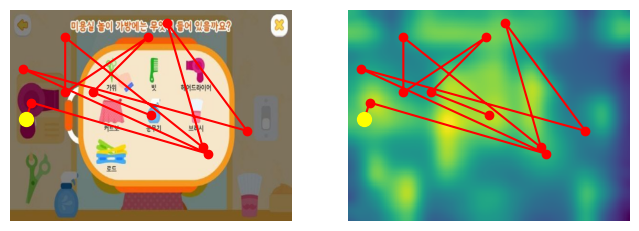

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.ndimage import zoom
from scipy.special import logsumexp

# 이미지를 불러옵니다.
image_path = 'b.jpg'  # 여기에 자신의 이미지 경로를 입력하세요.
image = Image.open(image_path)
image = image.resize((1024, 768))  # 필요에 따라 이미지를 리사이즈합니다.
image = np.array(image)

# 이미지의 초기 고정부터 시작하여 x 및 y(픽셀 좌표)의 이전 스캔 경로 고정 위치
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700, 571, 861, 45, 718, 77, 58])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500, 49, 440, 214, 523, 337, 398])

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# centerbias 다운로드: https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

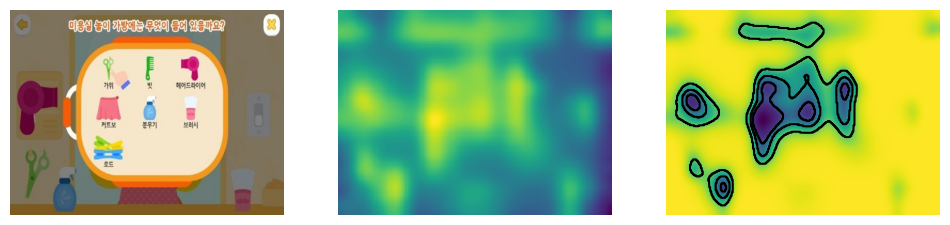

In [ ]:
import matplotlib.pyplot as plt
from pysaliency.plotting import visualize_distribution

f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].set_axis_off()
visualize_distribution(log_density_prediction.detach().cpu().numpy()[0, 0], ax=axs[2])
axs[2].set_axis_off()

# test

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img = cv2.imread('contents/1/frame_0010.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

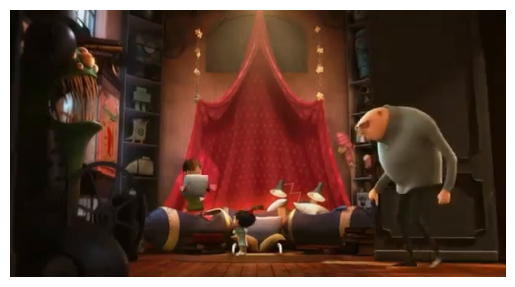

In [4]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [5]:
# 가우시안 피라미드 생성
def FMCreateGaussianPyr(src):
    dst = list()
    dst.append(src)
    for i in range(1,9):
        nowdst = cv2.pyrDown(dst[i-1])
        dst.append(nowdst)
    return dst

img_pyr = FMCreateGaussianPyr(img_rgb)

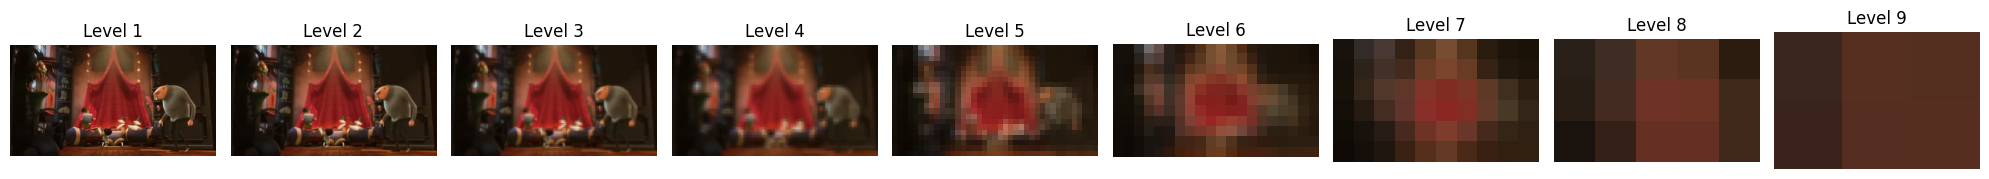

In [6]:
# 가우시안 피라미드 시각화
pyr_len = len(img_pyr)
fig, axes = plt.subplots(1, pyr_len, figsize=(20, 5))

for i in range(pyr_len):
    axes[i].imshow(img_pyr[i])
    axes[i].axis('off')
    axes[i].set_title(f'Level {i+1}')

plt.tight_layout()
plt.show()

In [16]:
# 피라미드 shape 확인
for i in range(len(img_pyr)):
    print(img_pyr[i].shape)

(336, 624, 3)
(168, 312, 3)
(84, 156, 3)
(42, 78, 3)
(21, 39, 3)
(11, 20, 3)
(6, 10, 3)
(3, 5, 3)
(2, 3, 3)


In [21]:
img_pyr[2].shape[1], img_pyr[2].shape[0]

(156, 84)

In [23]:
img_pyr[5].shape

(11, 20, 3)

In [33]:
k = cv2.resize(img_pyr[5].shape, (img_pyr[2].shape[1], img_pyr[2].shape[0]), interpolation=cv2.INTER_LINEAR)
k

array([[11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       ...,
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.]])

In [32]:
cv2.absdiff(img_pyr[2].shape, k)

array([[73., 73., 73., ..., 73., 73., 73.],
       [73., 73., 73., ..., 73., 73., 73.],
       [73., 73., 73., ..., 73., 73., 73.],
       ...,
       [81., 81., 81., ..., 81., 81., 81.],
       [81., 81., 81., ..., 81., 81., 81.],
       [81., 81., 81., ..., 81., 81., 81.]])

In [34]:
# 중심-주변 차이 계산
def FMCenterSurroundDiff(GaussianMaps):
    dst = list()
    for s in range(2,5):
        now_size = GaussianMaps[s].shape
        now_size = (now_size[1], now_size[0])  ## (width, height)
        tmp = cv2.resize(GaussianMaps[s+3], now_size, interpolation=cv2.INTER_LINEAR)
        nowdst = cv2.absdiff(GaussianMaps[s], tmp)
        dst.append(nowdst)
        tmp = cv2.resize(GaussianMaps[s+4], now_size, interpolation=cv2.INTER_LINEAR)
        nowdst = cv2.absdiff(GaussianMaps[s], tmp)
        dst.append(nowdst)
    return dst

img_diff = FMCenterSurroundDiff(img_pyr)

In [43]:
for i in range(len(img_diff)):
    print(img_diff[i].shape)

(84, 156, 3)
(84, 156, 3)
(42, 78, 3)
(42, 78, 3)
(21, 39, 3)
(21, 39, 3)


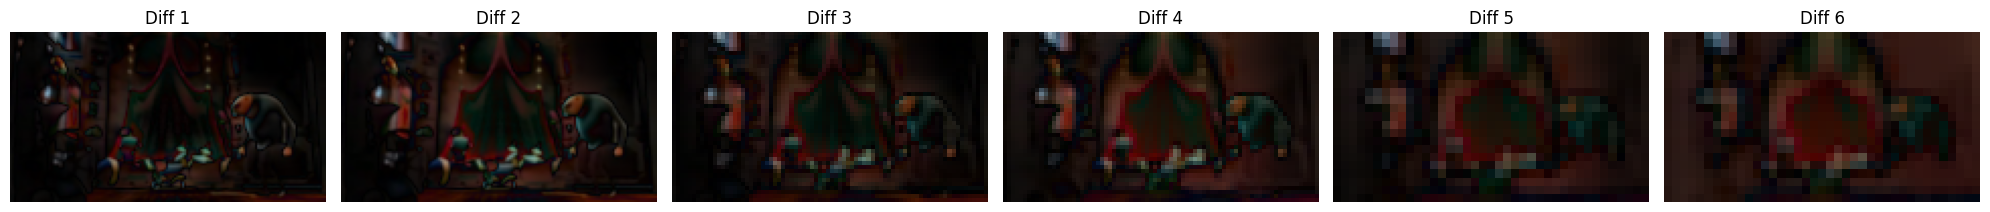

In [7]:
# 중심-주변 차이 시각화
len_diff = len(img_diff)
fig, axes = plt.subplots(1, len_diff, figsize=(20, 5))

for i in range(len_diff):
    axes[i].imshow(img_diff[i])
    axes[i].axis('off')
    axes[i].set_title(f'Diff {i+1}')

plt.tight_layout()
plt.show()

In [8]:
# 가우시안 피라미드 생성 및 중심-주변 차이 계산: 그냥 위의 두 함수를 합쳐놓은거임(결과는 img_diff와 같음)
def FMGaussianPyrCSD(src):
    GaussianMaps = FMCreateGaussianPyr(src)
    dst = FMCenterSurroundDiff(GaussianMaps)
    return dst

-----

In [9]:
# 색상 채널 추출
def SMExtractRGBI(inputImage):
    # 배열 요소의 스케일 변환
    src = np.float32(inputImage) * 1./255
    # 분할
    (B, G, R) = cv2.split(src)
    # 강도 이미지 추출
    I = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    # 반환
    return R, G, B, I

R, G, B, I = SMExtractRGBI(img)

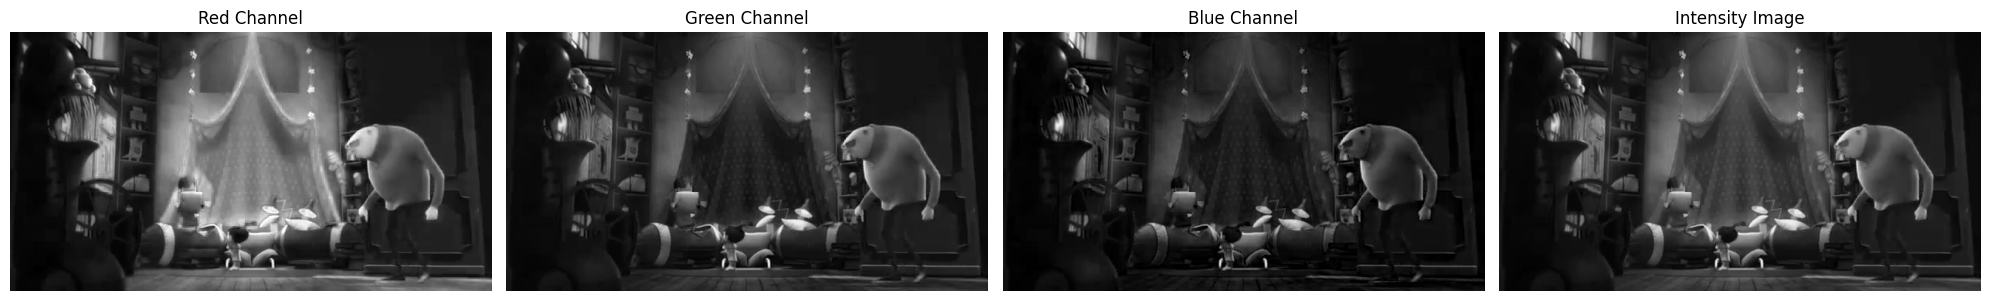

In [15]:
# 각 채널 시각화
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(R, cmap='gray')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(G, cmap='gray')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(B, cmap='gray')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

axes[3].imshow(I, cmap='gray')
axes[3].set_title('Intensity Image')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [16]:
## 강도 특징 맵
def IFMGetFM(I):
    return FMGaussianPyrCSD(I)

I_csd = FMGaussianPyrCSD(I)

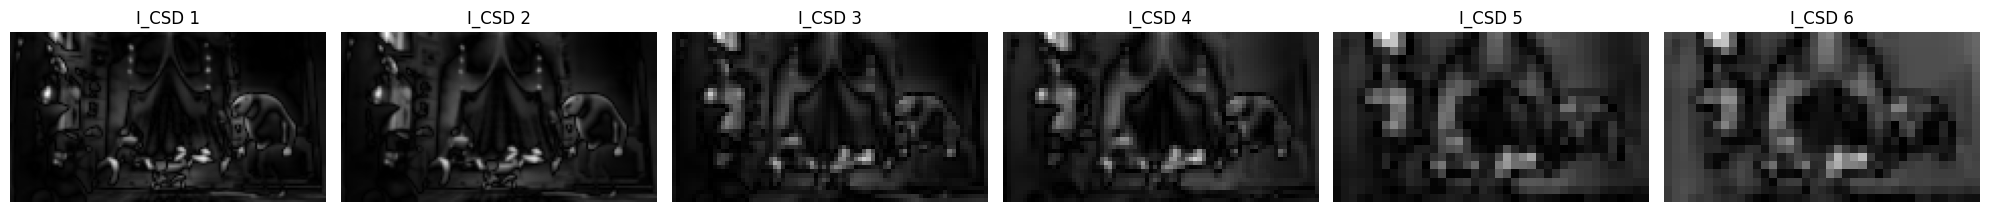

In [17]:
# 강도 특징 맵 시각화
len_I_csd = len(I_csd)
fig, axes = plt.subplots(1, len_I_csd, figsize=(20, 5))

for i in range(len_I_csd):
    axes[i].imshow(cv2.normalize(I_csd[i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'I_CSD {i+1}')

plt.tight_layout()
plt.show()

In [18]:
## 색상 특징 맵
def CFMGetFM(R, G, B):
    # max(R,G,B)
    tmp1 = cv2.max(R, G)
    RGBMax = cv2.max(B, tmp1)
    RGBMax[RGBMax <= 0] = 0.0001    # 0으로 나누는 것을 방지
    # min(R,G)
    RGMin = cv2.min(R, G)
    # RG = (R-G)/max(R,G,B)
    RG = (R - G) / RGBMax
    # BY = (B-min(R,G)/max(R,G,B)
    BY = (B - RGMin) / RGBMax
    # 음수 값은 0으로 클램프
    RG[RG < 0] = 0
    BY[BY < 0] = 0
    # 강도와 같은 방식으로 특징 맵 얻기
    RGFM = FMGaussianPyrCSD(RG)
    BYFM = FMGaussianPyrCSD(BY)
    # 반환
    return RGFM, BYFM

rgfm, byfm = CFMGetFM(R, G, B)

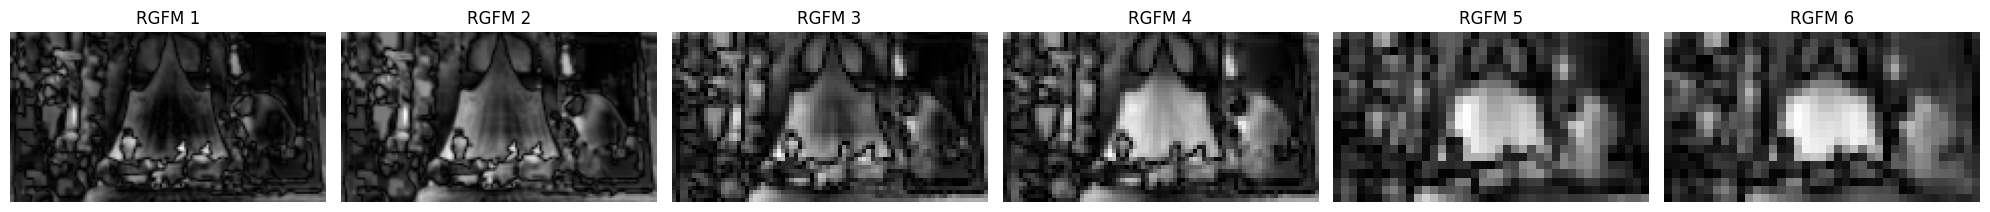

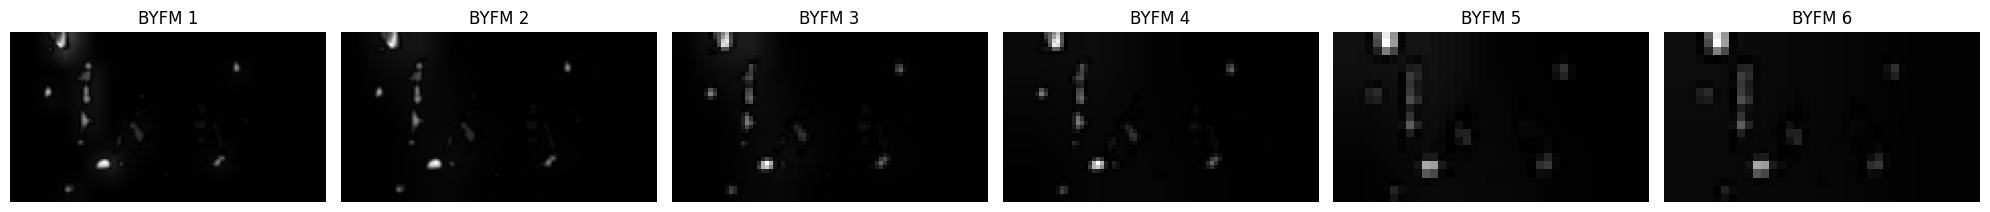

In [19]:
# 색상 특징 맵 시각화
def visualize_feature_maps(feature_maps, title_prefix):
    len_fm = len(feature_maps)
    _, axes = plt.subplots(1, len_fm, figsize=(20, 5))

    for i in range(len_fm):
        axes[i].imshow(cv2.normalize(feature_maps[i], None, 0, 255, cv2.NORM_MINMAX), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'{title_prefix} {i+1}')

    plt.tight_layout()
    plt.show()

# RG 특징 맵 시각화
visualize_feature_maps(rgfm, 'RGFM')

# BY 특징 맵 시각화
visualize_feature_maps(byfm, 'BYFM')

In [22]:
# 가보 필터(Gabor filter)의 계수
GaborKernel_0 = [\
    [ 1.85212E-06, 1.28181E-05, -0.000350433, -0.000136537, 0.002010422, -0.000136537, -0.000350433, 1.28181E-05, 1.85212E-06 ],\
    [ 2.80209E-05, 0.000193926, -0.005301717, -0.002065674, 0.030415784, -0.002065674, -0.005301717, 0.000193926, 2.80209E-05 ],\
    [ 0.000195076, 0.001350077, -0.036909595, -0.014380852, 0.211749204, -0.014380852, -0.036909595, 0.001350077, 0.000195076 ],\
    [ 0.000624940, 0.004325061, -0.118242318, -0.046070008, 0.678352526, -0.046070008, -0.118242318, 0.004325061, 0.000624940 ],\
    [ 0.000921261, 0.006375831, -0.174308068, -0.067914552, 1.000000000, -0.067914552, -0.174308068, 0.006375831, 0.000921261 ],\
    [ 0.000624940, 0.004325061, -0.118242318, -0.046070008, 0.678352526, -0.046070008, -0.118242318, 0.004325061, 0.000624940 ],\
    [ 0.000195076, 0.001350077, -0.036909595, -0.014380852, 0.211749204, -0.014380852, -0.036909595, 0.001350077, 0.000195076 ],\
    [ 2.80209E-05, 0.000193926, -0.005301717, -0.002065674, 0.030415784, -0.002065674, -0.005301717, 0.000193926, 2.80209E-05 ],\
    [ 1.85212E-06, 1.28181E-05, -0.000350433, -0.000136537, 0.002010422, -0.000136537, -0.000350433, 1.28181E-05, 1.85212E-06 ]\
]
GaborKernel_45 = [\
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05,  0.000744712,  0.000132863, -9.04408E-06, -1.01551E-06 ],\
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700,  0.000389916,  0.003516954,  0.000288732, -9.04408E-06 ],\
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072,  0.000847346,  0.003516954,  0.000132863 ],\
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072,  0.000389916,  0.000744712 ],\
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000,  0.249959607, -0.139178011, -0.022947700,  3.79931E-05 ],\
    [  0.000744712,  0.003899160, -0.108372072, -0.302454279,  0.249959607,  0.460162150,  0.052928748, -0.013561362, -0.001028923 ],\
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011,  0.052928748,  0.044837725,  0.002373205, -0.000279806 ],\
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362,  0.002373205,  0.000925120,  2.25320E-05 ],\
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806,  2.25320E-05,  4.04180E-06 ]\
]
GaborKernel_90 = [\
    [  1.85212E-06,  2.80209E-05,  0.000195076,  0.000624940,  0.000921261,  0.000624940,  0.000195076,  2.80209E-05,  1.85212E-06 ],\
    [  1.28181E-05,  0.000193926,  0.001350077,  0.004325061,  0.006375831,  0.004325061,  0.001350077,  0.000193926,  1.28181E-05 ],\
    [ -0.000350433, -0.005301717, -0.036909595, -0.118242318, -0.174308068, -0.118242318, -0.036909595, -0.005301717, -0.000350433 ],\
    [ -0.000136537, -0.002065674, -0.014380852, -0.046070008, -0.067914552, -0.046070008, -0.014380852, -0.002065674, -0.000136537 ],\
    [  0.002010422,  0.030415784,  0.211749204,  0.678352526,  1.000000000,  0.678352526,  0.211749204,  0.030415784,  0.002010422 ],\
    [ -0.000136537, -0.002065674, -0.014380852, -0.046070008, -0.067914552, -0.046070008, -0.014380852, -0.002065674, -0.000136537 ],\
    [ -0.000350433, -0.005301717, -0.036909595, -0.118242318, -0.174308068, -0.118242318, -0.036909595, -0.005301717, -0.000350433 ],\
    [  1.28181E-05,  0.000193926,  0.001350077,  0.004325061,  0.006375831,  0.004325061,  0.001350077,  0.000193926,  1.28181E-05 ],\
    [  1.85212E-06,  2.80209E-05,  0.000195076,  0.000624940,  0.000921261,  0.000624940,  0.000195076,  2.80209E-05,  1.85212E-06 ]
]
GaborKernel_135 = [\
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806, 2.2532E-05, 4.0418E-06 ],\
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362, 0.002373205, 0.00092512, 2.2532E-05 ],\
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011, 0.052928748, 0.044837725, 0.002373205, -0.000279806 ],\
    [  0.000744712,  0.000389916, -0.108372072, -0.302454279,  0.249959607, 0.46016215, 0.052928748, -0.013561362, -0.001028923 ],\
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000, 0.249959607, -0.139178011, -0.0229477, 3.79931E-05 ],\
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072, 0.000389916, 0.000744712 ],\
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072, 0.000847346, 0.003516954, 0.000132863 ],\
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700, 0.000389916, 0.003516954, 0.000288732, -9.04408E-06 ],\
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05 , 0.000744712, 0.000132863, -9.04408E-06, -1.01551E-06 ]\
]

In [23]:
GaborKernel0   = np.array(GaborKernel_0)
GaborKernel45  = np.array(GaborKernel_45)
GaborKernel90  = np.array(GaborKernel_90)
GaborKernel135 = np.array(GaborKernel_135)

In [24]:
## 방향 특징 맵
def OFMGetFM(src):
    # 가우시안 피라미드 생성
    GaussianI = FMCreateGaussianPyr(src)
    # 강도 이미지에 가보 필터 적용하여 방향 특징 추출
    GaborOutput0   = [ np.empty((1,1)), np.empty((1,1)) ]  # 더미 데이터: 어떤 종류의 np.array()라도 상관 없음
    GaborOutput45  = [ np.empty((1,1)), np.empty((1,1)) ]
    GaborOutput90  = [ np.empty((1,1)), np.empty((1,1)) ]
    GaborOutput135 = [ np.empty((1,1)), np.empty((1,1)) ]
    for j in range(2,9):
        GaborOutput0.append(   cv2.filter2D(GaussianI[j], cv2.CV_32F, GaborKernel0) )
        GaborOutput45.append(  cv2.filter2D(GaussianI[j], cv2.CV_32F, GaborKernel45) )
        GaborOutput90.append(  cv2.filter2D(GaussianI[j], cv2.CV_32F, GaborKernel90) )
        GaborOutput135.append( cv2.filter2D(GaussianI[j], cv2.CV_32F, GaborKernel135) )
    # 각 방향에 대해 중심-주변 차이 계산
    CSD0   = FMCenterSurroundDiff(GaborOutput0)
    CSD45  = FMCenterSurroundDiff(GaborOutput45)
    CSD90  = FMCenterSurroundDiff(GaborOutput90)
    CSD135 = FMCenterSurroundDiff(GaborOutput135)
    # 연결
    dst = list(CSD0)
    dst.extend(CSD45)
    dst.extend(CSD90)
    dst.extend(CSD135)
    # 반환
    return dst

In [27]:
OFMGetFM(img)

[array([[[6.12154579e+00, 5.90814495e+00, 2.44780350e+00],
         [2.61943245e+00, 2.91642952e+00, 6.22517443e+00],
         [6.43724632e+00, 6.37937641e+00, 1.32179451e+00],
         ...,
         [6.22948885e-01, 1.88961697e+00, 1.95958519e+00],
         [1.27710342e-01, 1.39436436e+00, 1.46437836e+00],
         [1.43243790e-01, 1.40989685e+00, 1.47989082e+00]],
 
        [[6.02559566e+00, 5.85108376e+00, 2.45683098e+00],
         [2.58671212e+00, 2.86760139e+00, 6.32124662e+00],
         [6.23543167e+00, 6.01769352e+00, 1.87350845e+00],
         ...,
         [6.03131294e-01, 1.62246513e+00, 2.28326035e+00],
         [1.12870455e-01, 1.13215065e+00, 1.79302979e+00],
         [1.28232241e-01, 1.14750290e+00, 1.80840683e+00]],
 
        [[5.50510406e+00, 5.38650799e+00, 2.59990311e+00],
         [2.43130302e+00, 2.55236626e+00, 6.57145786e+00],
         [5.55395651e+00, 4.69557953e+00, 4.00114536e+00],
         ...,
         [4.55874920e-01, 9.62555885e-01, 3.00707626e+00],
        